### Dataset

The problem is to optimize advertising, it means to select the best ad to show which will generates more clicks and hopelly more people purchase the product or contract a service.

The dataset has 10 ads (in columns) representing landscapes to inviting people to go on vacation. Every row has 1's and 0's, 1 when a user has clicked on the ad then there is a 1. In real world, this simulate a online process, going to down we need to figure out on the fly the best ad. In a nutshell the dataset is a simulation...

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read dataset

In [2]:
DATASET_URL = "../../../../datasets/ml_az_course/010_Ads_CTR_ClickThroughRate_Optimisation.csv"

In [3]:
dataset = pd.read_csv(DATASET_URL)
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [4]:
import math

In [9]:
number_rounds = dataset.shape[0]
number_ads = dataset.shape[1]

ads_selected = []
number_selections = [0] * number_ads
acc_rewards = [0] * number_ads
total_reward = 0

for round, row in dataset.iterrows():
    max_ucb = 0
    ad_with_max_ucb = -1

    for j in range(number_ads):
        if number_selections[j] > 0:
            # step 2.1)
            average_reward = acc_rewards[j] / number_selections[j]
            # step 2.2) - confidence interval
            delta_i = math.sqrt(
                3/2 * (math.log(round + 1) / number_selections[j])
            )
            # step 3)
            upper_confidence_bound = average_reward + delta_i
        else:
            upper_confidence_bound = 1e400 # infinity

        if max_ucb < upper_confidence_bound:
            max_ucb = upper_confidence_bound
            ad_with_max_ucb = j

    # update accumulators
    ads_selected.append(ad_with_max_ucb)
    number_selections[ad_with_max_ucb] += 1

    reward = dataset.values[round, ad_with_max_ucb]
    acc_rewards[ad_with_max_ucb] += reward
    total_reward += reward

## Visualising the results

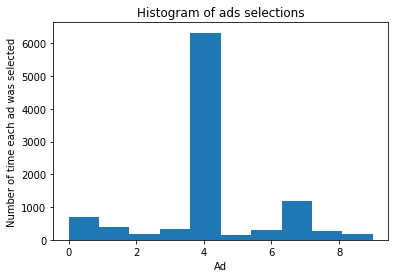

In [10]:
plt.hist(x=ads_selected)
plt.title(label="Histogram of ads selections")
plt.xlabel("Ad")
plt.ylabel("Number of time each ad was selected")
plt.show()

In [11]:
number_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [12]:
total_reward # is Thomson sampling better?

2178

**Note**: To know if the algorithm is able to identify the best ad, we can try with lower number of rounds, apparently it can't identify the best ad in 500 rounds.